In [5]:
"""
Inference & Representation - 2022 Fall HW1 
Question 2 PCA and Non-negative matrix factorization.

"""

"""
Tools for loading the MNIST Data.
From Optimization Based Data Analysis HW1
@author: Brett
"""
import numpy as np
from mnist_tools import *
from plot_tools import *
import matplotlib.pyplot as plt

"""
Given train (in the format returned by load_train_data in mnist_tools), 
and a 1d numpy array testImage you should return a tuple (digit,imageIdx).  digit is
an integer giving the numerical digit value of the training image closest 
to the testImage in Euclidean distance.  imageIdx is the row number of the closest 
training image in the 2d array train[digit].
"""

"""
Assumes the data file is in 'mnist_all.mat'.
"""

datafile = "mnist_all.mat" #Change if you put the file in a different path
train = load_train_data(datafile)

trainarr=np.asarray(train)
trainarr = np.reshape(trainarr, (trainarr.shape[0]*trainarr.shape[1],-1))
trainarr = trainarr.astype(float)
trainarr=trainarr-trainarr.mean(axis=0)


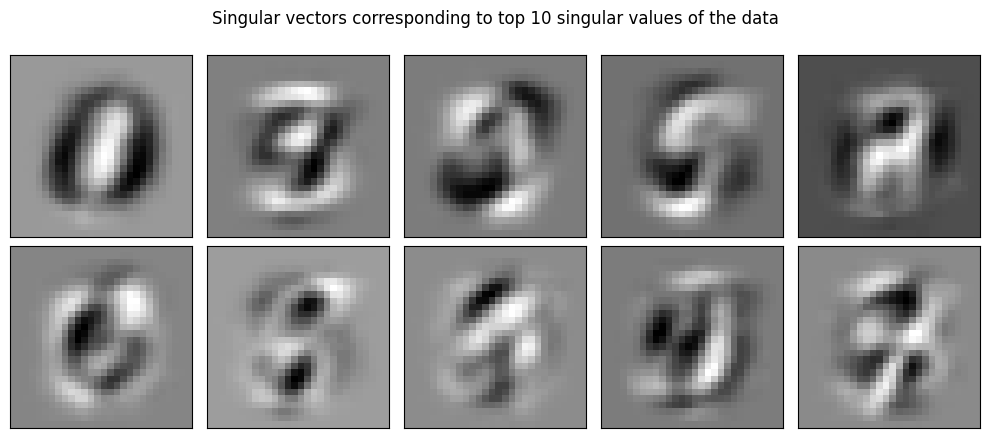

In [6]:
"""
Plot of the singular vectors corresponding 
to top 10 singular values of the data.
@author: Vlad 
"""
U, s, V = np.linalg.svd(trainarr, full_matrices=True)
n=10
imgs = [V[i,:] for i in range(n)]
plot_image_grid(imgs,
           "Singular vectors corresponding to top 10 singular values of the data")


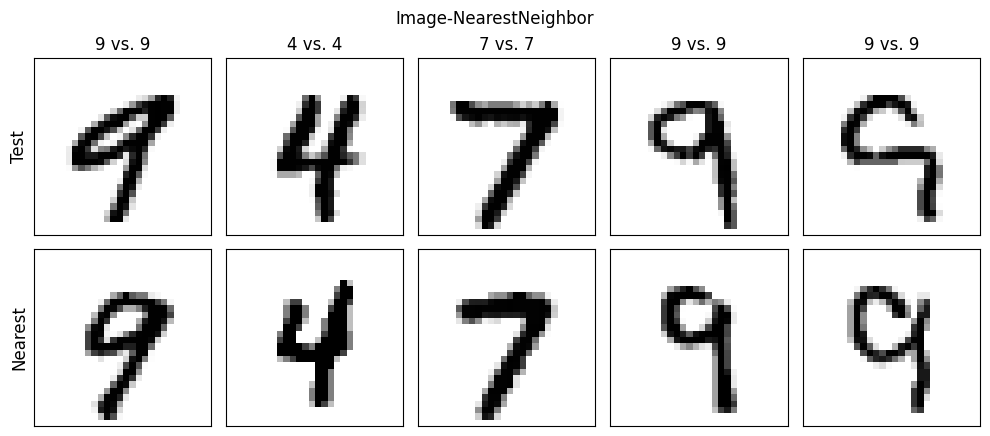

In [7]:
"""
Plot of the results of the nearest neighbour test applied 
to a principal component projection.
@author: Vlad 
"""

def project(V, Images) :
     return np.dot(V.T, np.dot(V, Images))
    
def compute_nearest_neighbors(train, testImage, V) :
    train=[np.array(i, dtype=float) for i in train]
    testImage= np.array(testImage, dtype=float)
    digit=0
    imageIdx=0
    dist=np.linalg.norm (project (V, train[digit][imageIdx])-project (V, testImage))
    for i in range(len(train)):
        for j in range (train[i].shape[0]):
            tempDist=np.linalg.norm (project(V,train[i][j])-project(V, testImage))
            if tempDist<dist:
                digit=i
                imageIdx =j
                dist= tempDist
    return digit, imageIdx 

n=8
U, s, V = np.linalg.svd(trainarr, full_matrices=False)
V=V[0:n,:]


test,testLabels = load_test_data(datafile)


imgs = []
TestLabels = []
for i in range(len(testLabels)) :
    trueDigit = testLabels[i]
    testImage = test[i]
    (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage,V)
    imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
    TestLabels.append(nnDig)

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Loading the MNIST data
datafile = "mnist_all.mat"
mnist_data = scipy.io.loadmat(datafile)

# Checking the keys in the loaded data
mnist_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

In [9]:
# Extracting training and testing data and labels
def extract_data_and_labels(mnist_data):
    data = []
    labels = []
    for i in range(10):
        train_data_key = f'train{i}'
        test_data_key = f'test{i}'
        train_data = mnist_data[train_data_key]
        test_data = mnist_data[test_data_key]
        combined_data = np.vstack((train_data, test_data))
        data.append(combined_data)
        labels.append(np.full((combined_data.shape[0],), i))
    return data, labels

# Getting the data and labels
data, labels = extract_data_and_labels(mnist_data)

# Checking the shape of extracted data for a specific digit
data[0].shape, labels[0].shape

((6903, 784), (6903,))

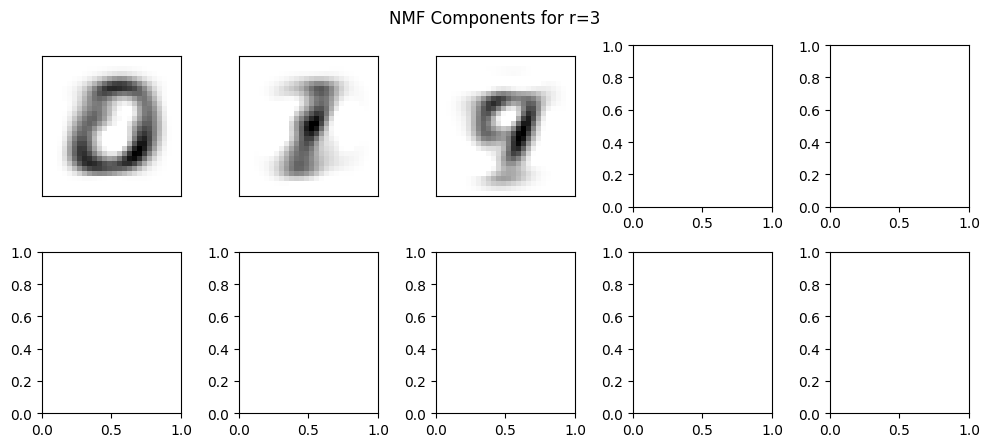

/home/karanvora/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


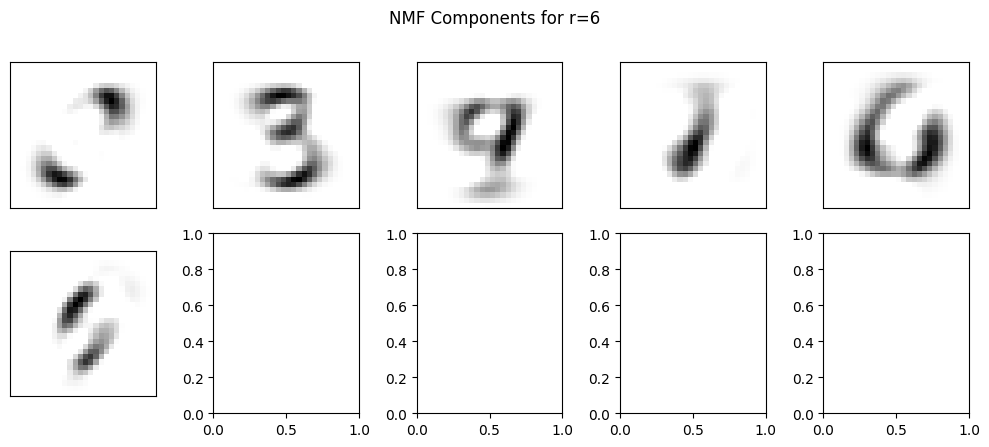

/home/karanvora/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


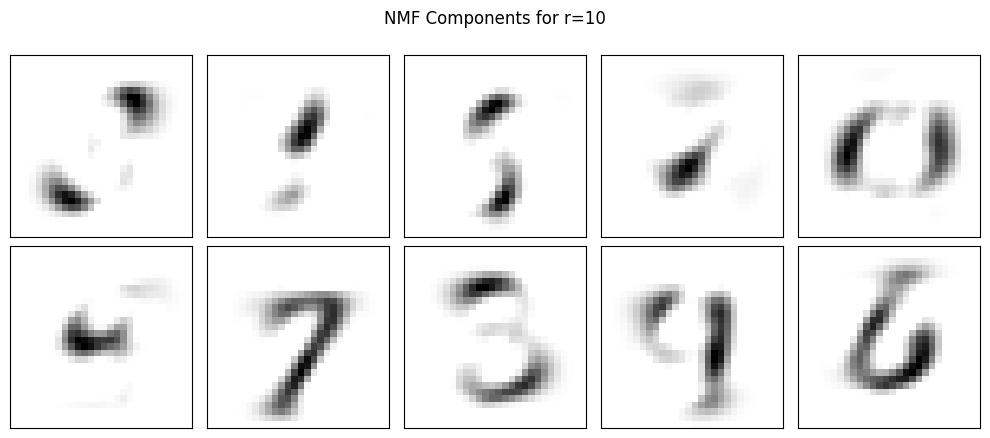

In [12]:
from sklearn.decomposition import NMF
import plot_tools

# Function to apply NMF and plot the components
def apply_nmf_and_plot(data, n_components):
    # Combining all digit data
    all_data = np.vstack(data)
    
    # Applying NMF
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    W = nmf.fit_transform(all_data)
    H = nmf.components_
    
    # Plotting the components
    plot_tools.plot_image_grid(H, f"NMF Components for r={n_components}", image_shape=(28, 28))
    
# Plotting function (from the provided plot_tools.py with minor modifications)
# def plot_image_grid(images, title, image_shape=(28, 28), n_col=5, n_row=2):
#     fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(2. * n_col, 2.26 * n_row))
#     axes = axes.flatten()  # Flattening the axes array to simplify the indexing
#     for i, comp in enumerate(images):
#         ax = axes[i]
#         ax.imshow(comp.reshape(image_shape), cmap=plt.cm.gray_r, interpolation='nearest')
#         ax.set_xticks(())
#         ax.set_yticks(())
    
#     fig.suptitle(title)
#     plt.show()

# Re-running the NMF and plotting for r in {3, 6, 10}
for r in [3, 6, 10]:
    apply_nmf_and_plot(data, r)

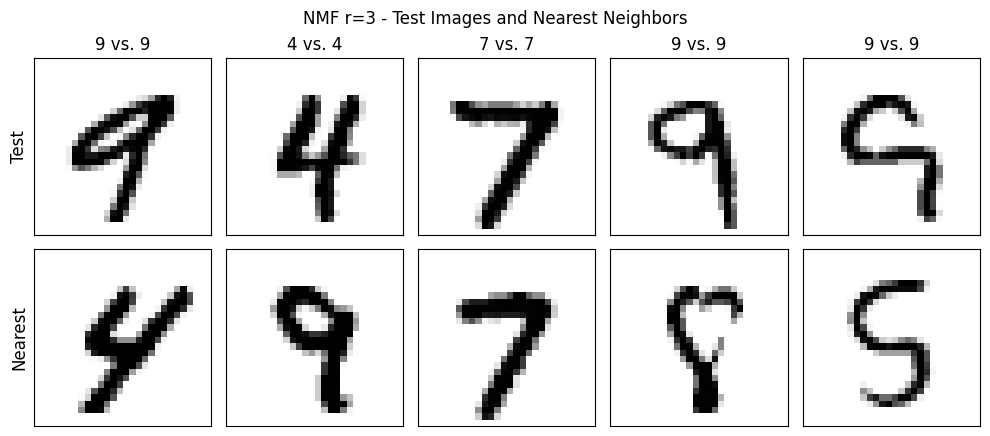

In [24]:
# Correcting the dimension mismatch error in the compute_nearest_neighbors_NMF function
def compute_nearest_neighbors_NMF(train, testImage, H):
    projected_train = [np.dot(np.array(i, dtype=float), H.T) for i in train]  # Corrected this line
    projected_test = np.dot(np.array(testImage, dtype=float), H.T)  # Corrected this line
    digit = 0
    imageIdx = 0
    dist = np.linalg.norm(projected_train[digit][imageIdx] - projected_test)
    
    for i in range(len(train)):
        for j in range(train[i].shape[0]):
            tempDist = np.linalg.norm(projected_train[i][j] - projected_test)
            if tempDist < dist:
                digit = i
                imageIdx = j
                dist = tempDist
    return digit, imageIdx

# Apply NMF with r=3
r = 3
nmf = NMF(n_components=r, init='random', random_state=0)
W = nmf.fit_transform(trainarr)
H = nmf.components_

# Find the nearest neighbors for all test images again
nmf_imgs = []
for i in range(len(testLabels)):
    nnDig, nnIdx = compute_nearest_neighbors_NMF(train, test[i], H)
    nmf_imgs.extend([test[i], train[nnDig][nnIdx,:]])

# Visualize the test images and their nearest neighbors
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(nmf_imgs, "NMF r=3 - Test Images and Nearest Neighbors", 
                (28,28), len(testLabels), 2, True, row_titles=['Test', 'Nearest'], col_titles=col_titles)

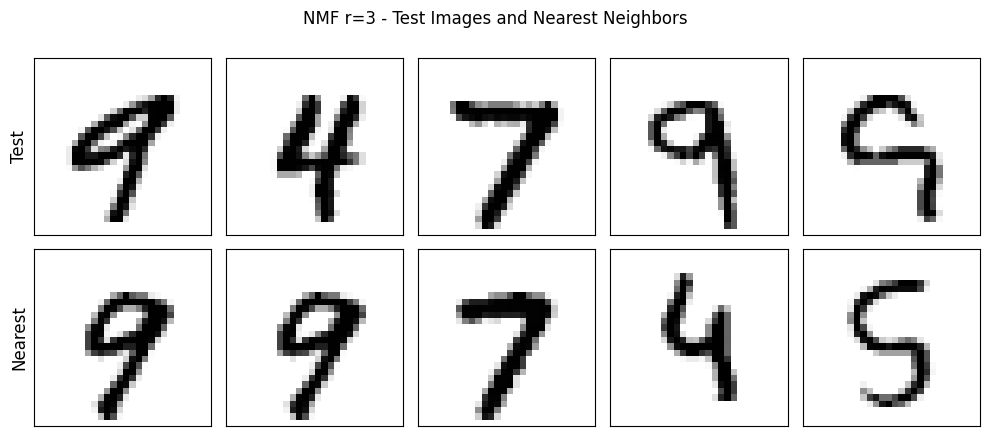

In [22]:
# Correcting the dimension mismatch error in the compute_nearest_neighbors_NMF function
def compute_nearest_neighbors_NMF(train, testImage, H):
    projected_train = [np.dot(np.array(i, dtype=float), H.T) for i in train]  # Corrected this line
    projected_test = np.dot(np.array(testImage, dtype=float), H.T)  # Corrected this line
    digit = 0
    imageIdx = 0
    dist = np.linalg.norm(projected_train[digit][imageIdx] - projected_test)
    
    for i in range(len(train)):
        for j in range(train[i].shape[0]):
            tempDist = np.linalg.norm(projected_train[i][j] - projected_test)
            if tempDist < dist:
                digit = i
                imageIdx = j
                dist = tempDist
    return digit, imageIdx

# Apply NMF with r=3
r = 6
nmf = NMF(n_components=r, init='random', random_state=0)
W = nmf.fit_transform(trainarr)
H = nmf.components_

# Find the nearest neighbors for all test images again
nmf_imgs = []
for i in range(len(testLabels)):
    nnDig, nnIdx = compute_nearest_neighbors_NMF(train, test[i], H)
    nmf_imgs.extend([test[i], train[nnDig][nnIdx,:]])

# Visualize the test images and their nearest neighbors
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(nmf_imgs, "NMF r=6 - Test Images and Nearest Neighbors", 
                (28,28), len(testLabels), 2, True, row_titles=['Test', 'Nearest'], col_titles=col_titles)

/home/karanvora/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


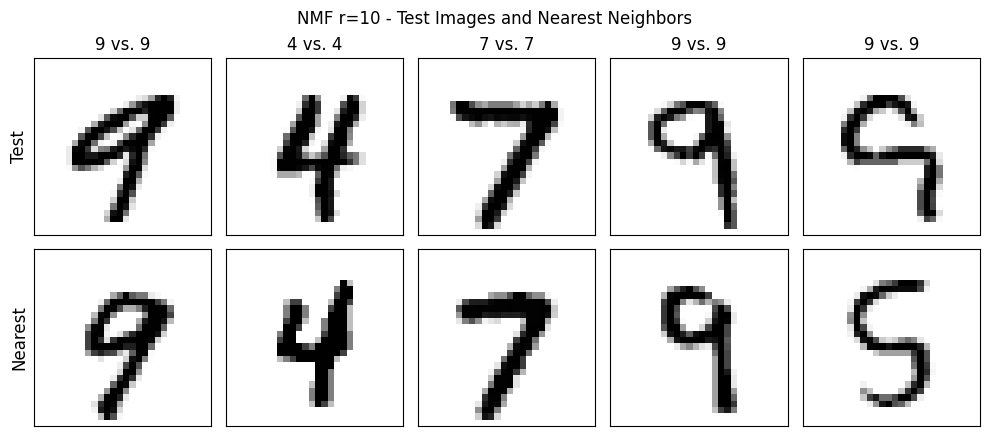

In [25]:
# Correcting the dimension mismatch error in the compute_nearest_neighbors_NMF function
def compute_nearest_neighbors_NMF(train, testImage, H):
    projected_train = [np.dot(np.array(i, dtype=float), H.T) for i in train]  # Corrected this line
    projected_test = np.dot(np.array(testImage, dtype=float), H.T)  # Corrected this line
    digit = 0
    imageIdx = 0
    dist = np.linalg.norm(projected_train[digit][imageIdx] - projected_test)
    
    for i in range(len(train)):
        for j in range(train[i].shape[0]):
            tempDist = np.linalg.norm(projected_train[i][j] - projected_test)
            if tempDist < dist:
                digit = i
                imageIdx = j
                dist = tempDist
    return digit, imageIdx

# Apply NMF with r=3
r = 10
nmf = NMF(n_components=r, init='random', random_state=0)
W = nmf.fit_transform(trainarr)
H = nmf.components_

# Find the nearest neighbors for all test images again
nmf_imgs = []
for i in range(len(testLabels)):
    nnDig, nnIdx = compute_nearest_neighbors_NMF(train, test[i], H)
    nmf_imgs.extend([test[i], train[nnDig][nnIdx,:]])

# Visualize the test images and their nearest neighbors
plot_image_grid(nmf_imgs, "NMF r=10 - Test Images and Nearest Neighbors", 
                (28,28), len(testLabels), 2, True, row_titles=['Test', 'Nearest'], col_titles=col_titles)

For C, Ir is clear with PCA the matches are far more closer and accurate then NMF. NMF requires higher r number to get accurate enough
Information.